<a href="https://colab.research.google.com/github/adhish-bahl/2347203_NNDL_Lab/blob/main/2347203_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Libraries**

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### **Loading Dataset**

In [43]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### **Part 1: CNN Autoencoder**

**Reshape for CNN input**

In [44]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

**Define the CNN Autoencoder**

In [45]:
input_shape = x_train.shape[1:]

**Encoder**

In [46]:
encoder = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same')
])

ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 1, 32) and input of shape (None, 32, 32, 3, 1).

**Decoder**

In [36]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

**Model**

In [37]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,073 (293.25 KB)

 Trainable params: 75,073 (293.25 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Autoencoder**

In [38]:
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=128,
                          validation_data=(x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 208s 527ms/step - loss: 0.0223 - val_loss: 0.0104
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 188s 482ms/step - loss: 0.0102 - val_loss: 0.0095
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 495ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 211s 520ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 204s 523ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 244s 478ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 214s 508ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 510ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 515ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 197s 502ms/step - loss: 0.0078 - val_loss: 0.0077


**Visualize Input and Reconstructed Images**

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


ValueError: cannot reshape array of size 3072 into shape (32,32)

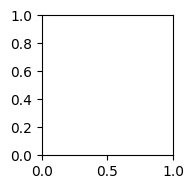

In [40]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

**Latent Space Visualization**

In [ ]:
encoder = Model(input_img, encoded)
latent_space = encoder.predict(x_test)

**Flatten the latent space for t-SNE or PCA**

In [ ]:
flat_latent_space = latent_space.reshape(latent_space.shape[0], -1)

**Apply PCA**

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flat_latent_space)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=np.arange(len(pca_result)), cmap='viridis', s=2)
plt.title('Latent Space Visualization with PCA')
plt.colorbar()
plt.show()

#### **Part 2: LSTM Autoencoder**

**Generate synthetic sequential data**

In [ ]:
def generate_sequence_data(num_samples, seq_length):
    return np.random.rand(num_samples, seq_length, 1)

seq_length = 50
num_samples = 1000

x_train = generate_sequence_data(num_samples, seq_length)
x_test = generate_sequence_data(200, seq_length)

**Define the LSTM Autoencoder**

In [ ]:
input_seq = Input(shape=(seq_length, 1))

**Encoder**

In [ ]:
encoded = LSTM(128, activation='relu', return_sequences=False)(input_seq)

**Decoder**

In [ ]:
decoded = RepeatVector(seq_length)(encoded)
decoded = LSTM(64, activation='relu', return_sequences=True)(decoded)
decoded = TimeDistributed(tf.keras.layers.Dense(1))(decoded)

**Model**

In [ ]:
lstm_autoencoder = Model(input_seq, decoded)
lstm_autoencoder.compile(optimizer='adam', loss='mse')
lstm_autoencoder.summary()

**Train the Autoencoder**

In [ ]:
history = lstm_autoencoder.fit(x_train, x_train,
                               epochs=30,
                               batch_size=32,
                               validation_data=(x_test, x_test))

**Visualize Original and Reconstructed Sequences**

In [ ]:
decoded_seqs = lstm_autoencoder.predict(x_test)

plt.figure(figsize=(10, 6))
for i in range(3):  # Plot a few sequences
    plt.plot(x_test[i].squeeze(), label='Original Sequence')
    plt.plot(decoded_seqs[i].squeeze(), label='Reconstructed Sequence', linestyle='dashed')
    plt.legend()
    plt.show()


#### **Part 3: Comparison and Discussion**